In [28]:
import pandas as pd

In [29]:
file_path = 'C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/Final_ROI_data.csv'  # Assuming the file is a .csv

In [30]:
data_df = pd.read_csv(file_path)


In [31]:
data_df['Day'] = data_df['Day'].str.extract('(\d+)').astype(int)

In [32]:
# Parsing 'List of points' to convert string representation of points into list of tuples
def parse_points_adjusted(points_str):
    points_list = []
    points_str = points_str.replace(')(', ') (')  # Ensure there's a space between each pair
    for point_str in points_str.split(' '):
        if point_str:
            point = tuple(map(int, point_str.strip('()').split(',')))
            points_list.append(point)
    return points_list

data_df['Points'] = data_df['List of points'].apply(parse_points_adjusted)

In [33]:
def generate_name(day, x, y, cluster, connected_component):
    return f"{day}_{x}_{y}_{cluster}_{connected_component}"


In [34]:
def generate_roi(name):
    parts = name.split('_')
    return '_'.join(parts[:3])

In [35]:
def map_month(day):
    year = (day - 1) // 365 + 1  # Calculate the year based on the day value
    day_within_year = (day - 1) % 365 + 1  # Calculate the day within the year

    month_end_days = [31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365]
    for month, end_day in enumerate(month_end_days, start=1):
        if day_within_year <= end_day:
            return month

In [36]:
class_data_path = 'C:/Users/kharep/Downloads/15x15_area_f.csv'
class_data = pd.read_csv(class_data_path)

In [37]:
def get_class_and_label_for_roi(roi):
    # Check if roi is in the 'ROI' column
    if roi in class_data['ROI'].values:
        # If roi is present, get the corresponding row
        row = class_data[class_data['ROI'] == roi]
        # Return the values of 'Class' and 'Label' columns
        return row['Class'].values[0], row['Label'].values[0]
    else:
        # If roi is not present, return None
        return None, None

In [38]:
# Expand the DataFrame
i = 0
num_matched = set()
expanded_rows = []
for _, row in data_df.iterrows():
    day = row['Day']
    cluster = row['Cluster']
    connected_component = row['ConectedComponent']
    for point in row['Points']:
        x, y = point
        name = generate_name(day, row['CenterX'], row['CenterY'], cluster, connected_component)
        roi = generate_roi(name)
        num_matched.add(roi)
        class_val, label = get_class_and_label_for_roi(roi)
        if class_val != None:
          expanded_rows.append({
            "Name": name,
            "ROI": roi,
            "Day": day,
            "Month": map_month(day),
            "Width": row['Width'],
            "Height": row['height'],
            "x": x,
            "y": y,
            'Class': class_val,
            'Label': label
          })

# Convert expanded rows into a DataFrame
expanded_df = pd.DataFrame(expanded_rows)

# Optionally, save the expanded DataFrame to a new CSV file
output_file_path = 'C:/Users/kharep/Downloads/Kmean_Norm_Non-Plus1/Final_ROI_Dataset.csv'

print(i)
# Display the first few rows of the expanded DataFrame
expanded_df.head()

0


,Name,ROI,Day,Month,Width,Height,x,y,Class,Label
0,1001_63_48_c13_cp2,1001_63_48,1001,9,6,4,62,47,2,COL
1,1001_63_48_c13_cp2,1001_63_48,1001,9,6,4,61,48,2,COL
2,1001_63_48_c13_cp2,1001_63_48,1001,9,6,4,62,49,2,COL
3,1001_63_48_c13_cp2,1001_63_48,1001,9,6,4,62,50,2,COL
4,1001_63_48_c13_cp2,1001_63_48,1001,9,6,4,64,50,2,COL


In [26]:
i = 0
for j in class_data['ROI'].values:
  if j not in num_matched:
    i +=1
print(i)

0


In [23]:
expanded_df.shape[0]

31093

In [24]:
data_df.shape[0]

3987

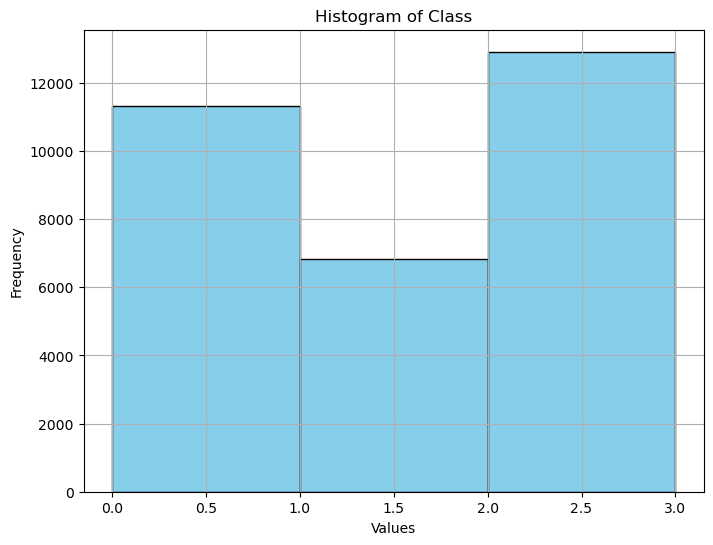

In [39]:
import matplotlib.pyplot as plt

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(expanded_df['Class'], bins=3, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Histogram of Class')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

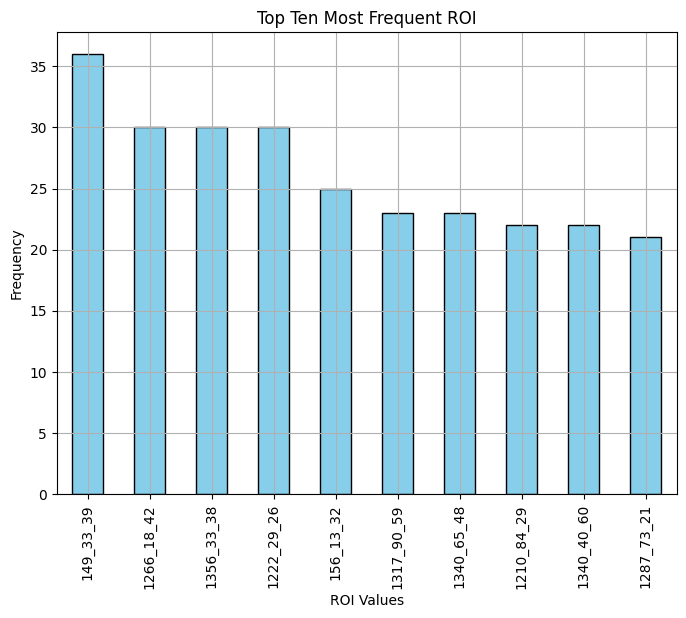

In [ ]:
top_ten_roi = expanded_df['ROI'].value_counts().nlargest(10)  # Extract top ten most frequent values
plt.figure(figsize=(8, 6))
top_ten_roi.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Ten Most Frequent ROI')
plt.xlabel('ROI Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [27]:
expanded_df.to_csv(output_file_path, index=False)